In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Introduction

This post shows you how to make publication-ready plots with matplotlib.

### matplotlibrc or style sheets

To align most stylistic choices, use a [``matplotlibrc``](https://matplotlib.org/users/customizing.html) file or style sheets. The difference between the two is that ``matplotlibrc`` is picked up from some locations, first your working directory, and automatically applied to your plots.

If you want to have a more dynamic approach, use style sheets which look like the following:

```
# content of file style.mplstyle

axes.axisbelow : True       # Draw axis grid lines and ticks below patches (True); above
                            # patches but below lines ('line'); or above all (False).
                            # Forces grid lines below figures.

font.size : 12              # Font size in pt.

grid.linewidth : 1.2        # In pt.

legend.framealpha : 1       # Legend patch transparency.
legend.scatterpoints : 3    # Number of scatter points in legend.

lines.linewidth : 3         # line width in pt.
```

First, here is the plot with the default settings.

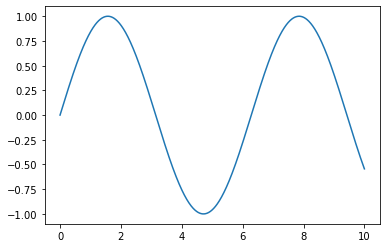

In [2]:
x = np.linspace(0, 10, 1000)

fig, ax = plt.subplots()

ax.plot(x, np.sin(x))

plt.show()
plt.close()

Now, apply the style and see the changes.

In [3]:
plt.style.use("../style.mplstyle")

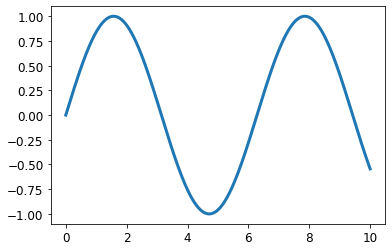

In [4]:
fig, ax = plt.subplots()

ax.plot(x, np.sin(x))

plt.show()
plt.close()

There are some other things you need to know about style sheets:

- You can use all the settings from ``matplotlibrc``.
- You can load multiple style sheets with ``plt.style.use("first_style", "second_style")`` where overlapping options are overwritten by the following style.
- I have made the observation that in notebooks you better load the style in a separate line to the imports because sometimes the changes are not picked up.

### The font

We would like the font in the plot to match the font in the text. Luckily, it is possible to use your [LaTeX distribution](https://matplotlib.org/3.1.0/tutorials/text/usetex.html) to compile the labels of the figures. In this case, my examination office required me to use Times New Roman which is available for matplotlib but not for pdflatex. pdflatex has only Times Roman in the package ``newtxtext``, but who will recognize the difference :).

In [5]:
# These parameters can also be put into the style or matplotlibrc.
# This is the dynamic approach of changing parameters.
nice_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "font.serif" : "Times New Roman",
}
matplotlib.rcParams.update(nice_fonts)

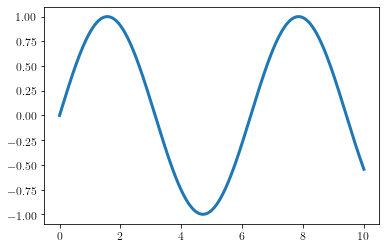

In [6]:
fig, ax = plt.subplots()

ax.plot(x, np.sin(x))

plt.show()
plt.close()

### The plot size

The plot size is extremely critical because it also sets the frame for all other options. E.g. if we want to embed an image within our thesis and the fontsize of the labels should match the thesis text, we cannot scale the figure with ``[width=\textwidth]``.

Furthermore, we want the plot size to be visually appealing where the golden ratio is a good rule of thumb for the ratio between width and height. The golden ratio is approximately 1.618.

The following function is from [Jack Walton's blog](https://jwalton.info/Embed-Publication-Matplotlib-Latex) and returns the correct figure height and width in inches (used in matplotlib) for a given figure width in points (LaTeX's measurement).

In [7]:
def set_size(width, fraction=1):
    """ Set aesthetic figure dimensions to avoid scaling in latex.

    Parameters
    ----------
    width: float
            Width in pts
    fraction: float
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5 ** 0.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    return fig_width_in, fig_height_in

At last, how do we know the ``\textwidth`` in points inside our document? Just insert ``\the\textwidth`` at the position of the figure in your text and it will be shown in your PDF document after compilation. If you are on a page in landscape mode, use ``\linewidth`` instead (thanks to [John Kormylo](https://tex.stackexchange.com/users/34505/john-kormylo) for [this](https://tex.stackexchange.com/a/155627)).

Assuming our thesis has text width of 400pt, the resulting figure looks like this.

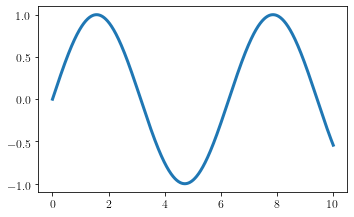

In [8]:
fig, ax = plt.subplots(figsize=set_size(400))

ax.plot(x, np.sin(x))

plt.show()
plt.close()

### Vector or raster graphics

This is the last thing to know about graphics. ``matplotlib`` has many options to export graphics. You have probably used ``png``, ``jpeg`` or ``pdf`` in the past. Just forget about the first two because they produce raster graphics instead of vector graphics. Vector graphics allow for almost infinite zooming whereas zooming into ``png`` and similar formats produces blurry and blocky pictures. ``pdf`` can be easily included with the general ``graphicx`` package of LaTeX.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Bitmap_VS_SVG.svg/300px-Bitmap_VS_SVG.svg.png" align="center"/>

### Conclusion

That's it! This is everyting you need for publication-ready plots with matplotlib :).

### References

- https://jwalton.info/Embed-Publication-Matplotlib-Latex